Generating Prompts

The initial step involves employing the provided ChatGPT free prompt to generate prompts for realistic-vision images.

________________________________

# Step 1: Prompt Template

In [5]:
####### Parameters #######

important_objects = "different kinds of bear" # If multiple add it like this: different kinds of bear, pepsi bottles, ... etc
number_of_prompts = 50 # between 50 to 100 is good
description_of_prompt = "bear in different environments" # A bit of description about the kind of images you need

####### Generated Prompt #######
print(f'''
Important Objects that must be present in each prompt:
{important_objects}

Input:
Generate {number_of_prompts} realistic prompts related to {description_of_prompt} for image generation.

Instructions:
Each prompt depicts real-life behavior.
Each prompt must contain all the important objects.
The important objects must be at different levels of distance (from very close to the camera to very far).

Output:
Return a Python list containing these prompts as strings for later use in training a computer vision model.
prompts = [prompt1, prompt2, ...]
''')


Important Objects that must be present in each prompt:
different kinds of bear

Input:
Generate 50 realistic prompts related to bear in different environments for image generation.

Instructions:
Each prompt depicts real-life behavior.
Each prompt must contain all the important objects.
The important objects must be at different levels of distance (from very close to the camera to very far).

Output:
Return a Python list containing these prompts as strings for later use in training a computer vision model.
prompts = [prompt1, prompt2, ...]



# Step 2: Pass the generated prompt in ChatGPT

It will generate a python list of string containing the prompts, copy the output:

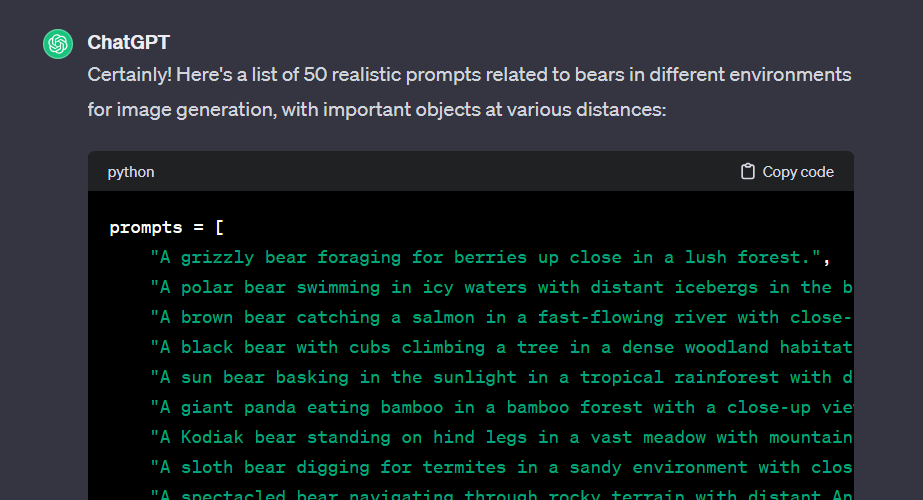

Replace it with your own created list

In [6]:
# Generated list must be replace with yours
prompts = ["A grizzly bear fishing in a river with a distant mountain in the background and a fish jumping out of the water.", "A black bear climbing a tree to reach a beehive with a beehive in the foreground and a forest in the distance.", "A polar bear standing on an iceberg in the Arctic Ocean with other icebergs in the background and a seal in the water.", "A brown bear catching a salmon in a rushing stream with trees on the riverbank and a bald eagle flying overhead.", "A panda bear eating bamboo in a bamboo forest with bamboo shoots in the foreground and a distant mountain range.", "A sun bear foraging for insects in a dense rainforest with tropical plants in the foreground and a waterfall in the distance.", "A spectacled bear climbing a rocky slope in the Andes mountains with llamas grazing in the distance.", "A sloth bear digging for termites in a grassy meadow with termite mounds in the foreground and a jungle in the background.", "A Kodiak bear standing on a rocky cliff near the ocean with crashing waves and a distant forest.", "A teddy bear sitting on a picnic blanket in a park with a picnic basket and a city skyline in the background.", "A bear family consisting of a mother bear and cubs playing in a meadow with wildflowers and a forest in the background.", "A grizzly bear scratching its back against a tree trunk with pine trees in the foreground and a snowy mountain in the distance.", "A black bear cub exploring a tree stump with flowers and a riverbank in the background.", "A polar bear swimming in icy waters with floating icebergs and a seal peeking out of the water.", "A brown bear lounging in a hot spring in a snowy landscape with steam rising and snow-covered trees in the background.", "A panda bear rolling in the grass with bamboo shoots and a pagoda in the background.", "A sun bear climbing a tree in a tropical rainforest with colorful birds in the canopy.", "A spectacled bear resting on a rocky ledge with a view of a lush valley below.", "A sloth bear with its tongue out, tasting honey from a beehive in a forest clearing.", "A Kodiak bear fishing in a river with a waterfall in the background and a mountainous landscape.", "A teddy bear hiking on a trail in the mountains with a backpack and a blue sky overhead.", "A grizzly bear standing on its hind legs in a field of wildflowers with a forest and mountains in the distance.", "A black bear cub climbing a tree with a lake and a sunset in the background.", "A polar bear playing in the snow with snowflakes falling and an icy landscape.", "A brown bear catching fish in a lake with a reflection of the mountains in the water.", "A panda bear sleeping in a tree with a crescent moon and stars in the night sky.", "A sun bear exploring a riverbank with colorful butterflies in the foreground and dense foliage in the background.", "A spectacled bear walking along a rocky ridge with a rainbow in the sky.", "A sloth bear with a playful expression in a grassy meadow with a forest in the background.", "A Kodiak bear walking along a rocky shoreline with crashing waves and seagulls in the air.", "A teddy bear riding a bicycle on a path through a sunny park with trees and flowers.", "A grizzly bear with a curious expression inspecting a camera trap in the woods.", "A black bear mother and cubs foraging for berries in a mountainous region.", "A polar bear resting on a snowy ledge with the northern lights dancing in the sky.", "A brown bear standing on its hind legs in a field of autumn foliage with a forest in the background.", "A panda bear eating a popsicle in a snowy landscape with snow-covered bamboo.", "A sun bear playing with a waterfall in a lush rainforest.", "A spectacled bear with a majestic pose on a cliff with a dramatic sunset in the background.", "A sloth bear peeking out from behind a tree trunk in a dense jungle.", "A Kodiak bear catching a fish in a river with a dense forest on the riverbanks.", "A teddy bear sitting on a rocking chair on a porch with a view of the countryside and rolling hills.", "A grizzly bear scratching its ear with a snowy mountain range in the background.", "A black bear cub with a playful stance in a field of daisies with a rainbow in the sky.", "A polar bear family walking across a frozen tundra with an icy landscape.", "A brown bear catching salmon in a stream with a forest and mountains in the background.", "A panda bear playing with a ball in a bamboo forest with bamboo shoots in the foreground.", "A sun bear with a surprised expression in a dense rainforest with colorful flowers.", "A spectacled bear standing on a moss-covered rock with a waterfall in the background.", "A sloth bear with a content expression resting in a sunny meadow.", "A Kodiak bear standing in a river with a salmon in its mouth and a forest in the background.", "A teddy bear reading a book on a cozy couch by a fireplace with a rug and bookshelf in the background."]

len(prompts)

51

# Step 3: Generating 100 images from the generated prompts
you can update the code based on your own choice

In [7]:
prompts = prompts * 2

# Shuffle the prompts
import random
random.shuffle(prompts)

len(prompts)

102

In [8]:
print(prompts[:4])

['A spectacled bear resting on a rocky ledge with a view of a lush valley below.', 'A spectacled bear standing on a moss-covered rock with a waterfall in the background.', 'A spectacled bear with a majestic pose on a cliff with a dramatic sunset in the background.', 'A spectacled bear resting on a rocky ledge with a view of a lush valley below.']


Using Realistic Vision Image generation Model (you can use your own)

Important
1. **Remove %%capture line if it throws any error**

2. **GPU Must be enabled for this task**

In [4]:
%%capture
!pip install diffusers

from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V5.0_noVAE") # Loading the model

pipeline = pipeline.to("cuda") # Converting to cuda

Generating Images and saving it in a folder named **/generated_images/** present in currect directory

In [13]:
generated_images = pipeline(prompts).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
import os

# Directory name
output_directory = "generated_images"

# Save each image in the directory
for i, image in enumerate(generated_images):
    # Save the image with a unique filename
    image.save(os.path.join(output_directory, f'image_{i + 1}.png'))

Printing the sample of generated images

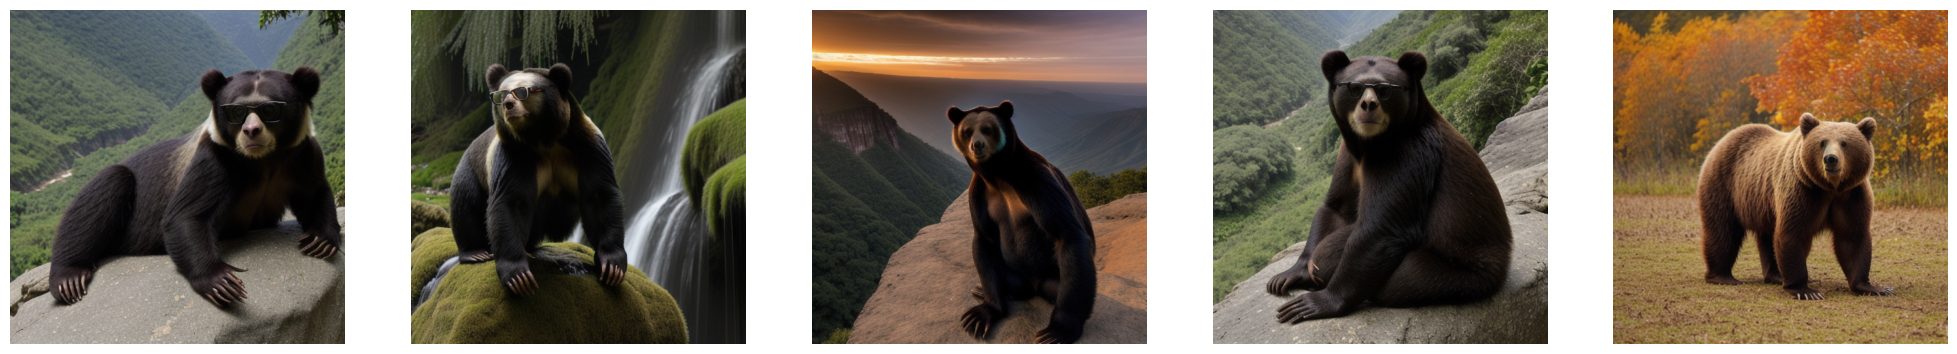

In [14]:
import matplotlib.pyplot as plt

# Set up the grid
rows = 1
columns = len(generated_images)

# Create a figure and axis
fig, axes = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5))

# Flatten axes if there's only one row
axes = axes.flatten()

# Display each image
for i, image in enumerate(generated_images):
    axes[i].imshow(image)
    axes[i].axis('off')

# Show the grid of images
plt.show()


# Step 4: Installing Autodistill
For auto labeling generated images

In [1]:
%%capture
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

Define ontology (What you want to detect in your generated images)

In [2]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "animal face": "animal face",
})

In [35]:
import shutil

shutil.rmtree('/content/output_folder', ignore_errors=True)

In [3]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder='/content/generated_images',
    extension=".png",
    output_folder='/content/output_folder')

trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)


final text_encoder_type: bert-base-uncased


Labeling /content/generated_images/image_5.png:   0%|          | 0/5 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling /content/generated_images/image_3.png:  20%|██        | 1/5 [00:17<01:08, 17.03s/it]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended

Labeled dataset created - ready for distillation.


In [4]:
ANNOTATIONS_DIRECTORY_PATH = f"/content/output_folder/train/labels"
IMAGES_DIRECTORY_PATH = f"/content/output_folder/train/images"
DATA_YAML_PATH = f"/content/output_folder/data.yaml"

SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (10,10)

In [5]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

4

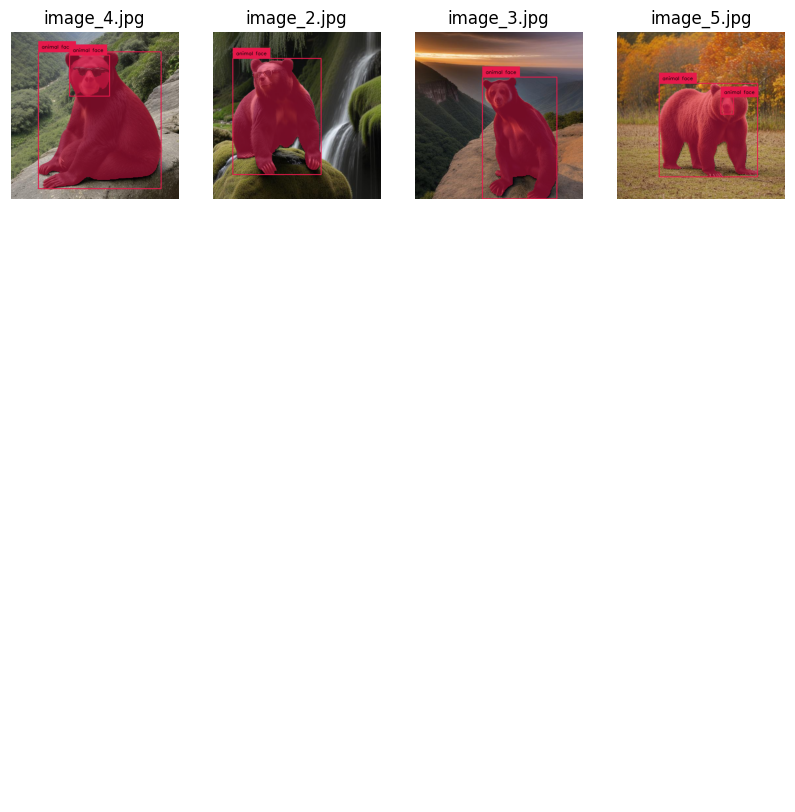

In [6]:
import supervision as sv

image_names = list(dataset.images.keys())[:5]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)